# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**  
## TRABAJO PRÁCTICO N° 1: APRENDIZAJE AUTOMÁTICO II
### **INTEGRANTES:** Caballero, Franco - (C-7328/8) | Rosito, Valentín - (R-4662/1)
### **Fecha Límite de Entrega:** ---
### **Semestre:** 2° Semestre 2025


# Problema 1)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import callbacks, layers, models


In [18]:
!gdown 15bGMsYf1exmEk1RF5Ol8Kg3_9sJAEihc -O dataset.csv
df = pd.read_csv("dataset.csv")


Downloading...
From: https://drive.google.com/uc?id=15bGMsYf1exmEk1RF5Ol8Kg3_9sJAEihc
To: /content/dataset.csv
100% 175k/175k [00:00<00:00, 12.3MB/s]


# EDA (Exploratory Data Analysis)


## Descripcion de las Variables

### Variables Categóricas
- Extracurricular Activities: Indica si el estudiante participa en actividades extracurriculares. Los valores son "Yes" o "No".
  
  
### Variables Numéricas
- Hours Studied: Cantidad de horas que el estudiante ha estudiado para un examen.

- Previous Scores: Puntaje obtenido por el estudiante en exámenes anteriores, lo que puede servir como indicador de su rendimiento histórico.

- Sleep Hours: Número de horas que el estudiante durmió la noche anterior al examen.

- Sample Question Papers Practiced: Cantidad de exámenes de práctica o modelos de preguntas que el estudiante ha resuelto.
  
  
### Target
- Performance Index: Variable objetivo que representa el puntaje de rendimiento del estudiante en el examen. Es un valor numérico continuo.

In [19]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [21]:
df.duplicated().value_counts()
df = df.drop_duplicates()

## Conclusión sobre valores nulos y duplicados
---
- Se detectaron registros **duplicados**, los cuales fueron eliminados para asegurar la integridad del dataset y evitar sesgos o sobreajustes en el modelo.  
- No se encontraron **valores nulos**, por lo que no fue necesario aplicar técnicas de imputación.  


## Gráficos

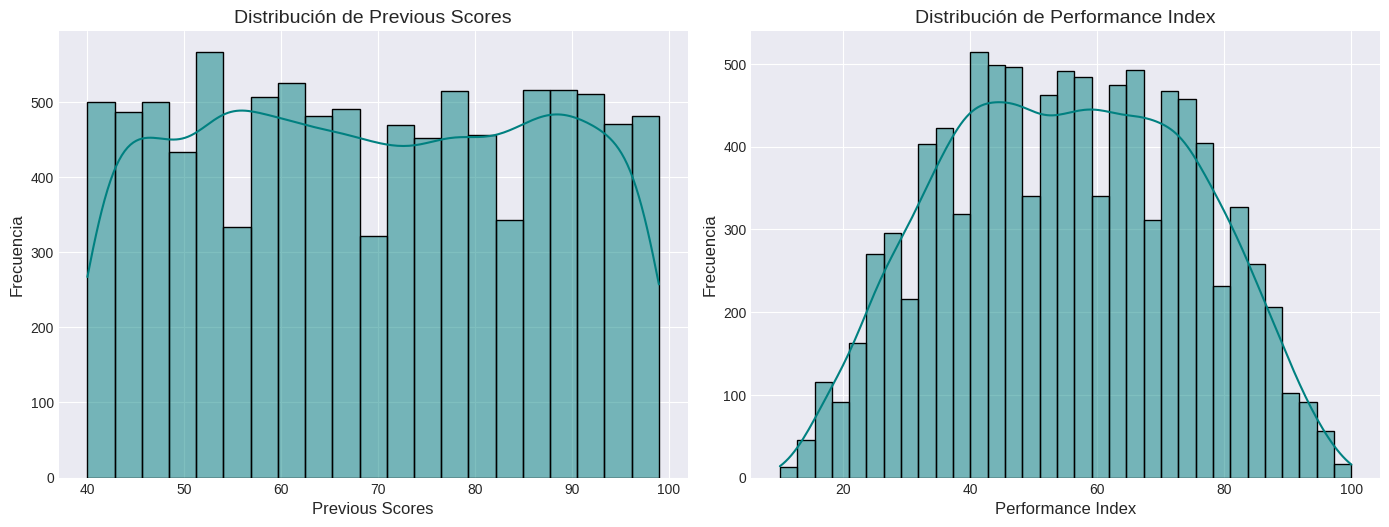

In [22]:
columnas_num_continuas = [
    'Previous Scores',
    'Performance Index'
]


plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(
    nrows=3, ncols=2,
    figsize=(14, 15)
)
axes = axes.flatten()

for i, col in enumerate(columnas_num_continuas):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)


if len(columnas_num_continuas) < len(axes):
    for j in range(len(columnas_num_continuas), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

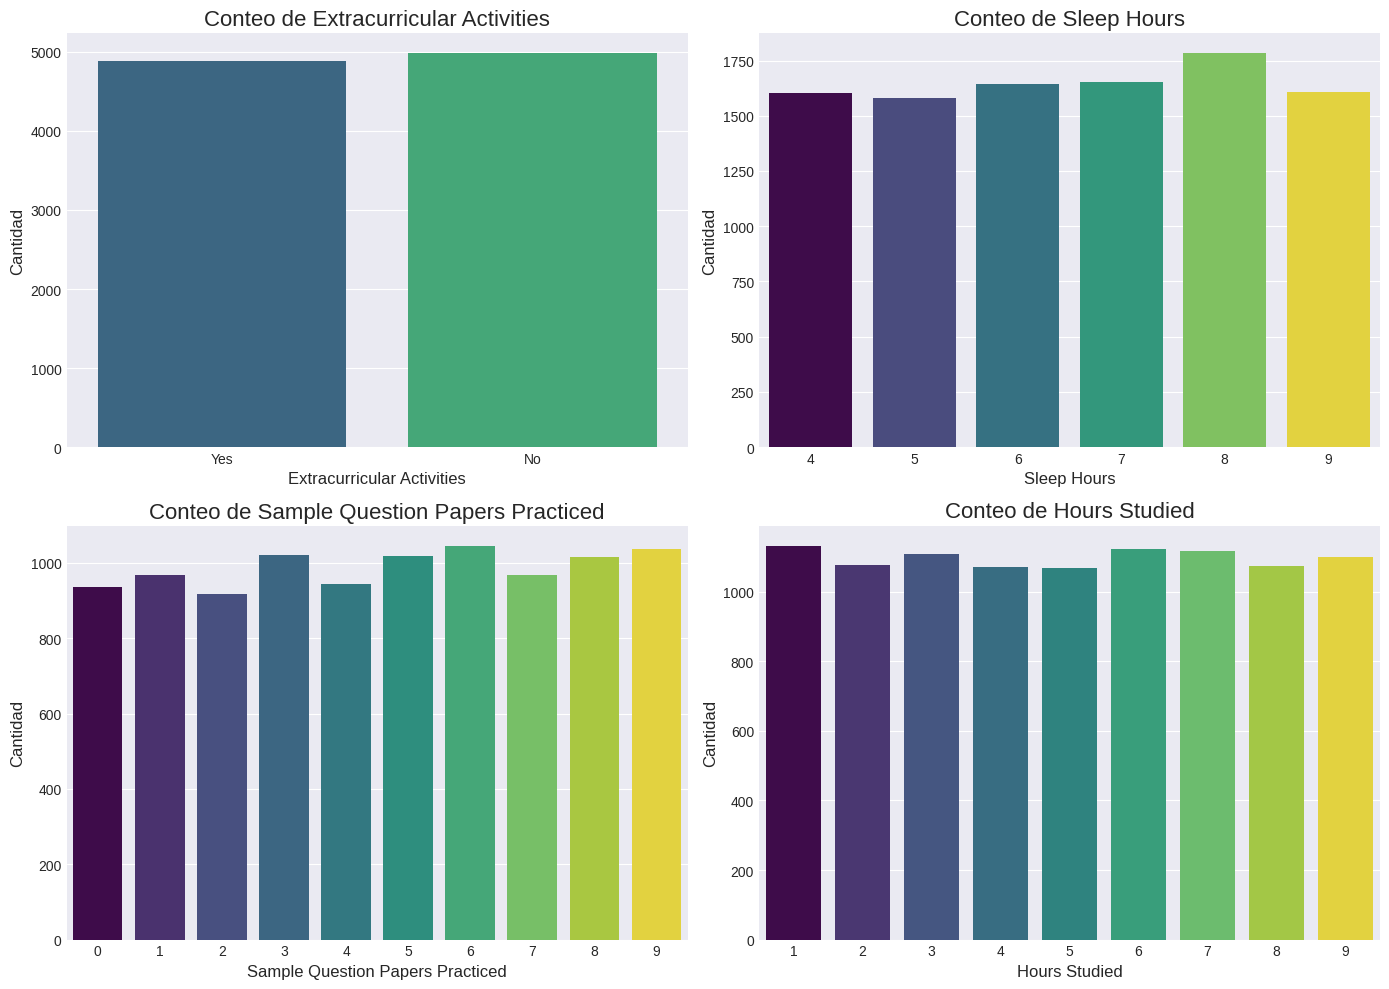

In [23]:
columnas_barra = [
    'Extracurricular Activities',
    'Sleep Hours',
    'Sample Question Papers Practiced',
    'Hours Studied'
]

fig, axes = plt.subplots(
    nrows=2, ncols=2,
    figsize=(14, 10)
)
axes = axes.flatten()

for i, col in enumerate(columnas_barra):
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        palette='viridis',
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f'Conteo de {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Cantidad', fontsize=12)


plt.tight_layout()
plt.show()

## Análisis de las distribuciones
---

- **Variables numéricas**  
  - **Sleep Hours**, **Sample Question Papers Practiced**, **Previous Scores** y **Hours Studied** muestran distribuciones relativamente **uniformes**, aunque con algunos picos en casos específicos.   
  - **Performance Index** (la variable *target*) exhibe una distribución aproximadamente normal, con concentración en valores medios (40–70) y menor frecuencia en los extremos.

- **Variable categórica**  
  - La variable categórica **Extracurricular Activities** muestra un comportamiento balanceado, con una ligera mayor frecuencia en la categoría No.


In [24]:
# Convertimos Extracurricular Activities en Booleana (Ya que es Yes, No)
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: True if x == 'Yes' else False)

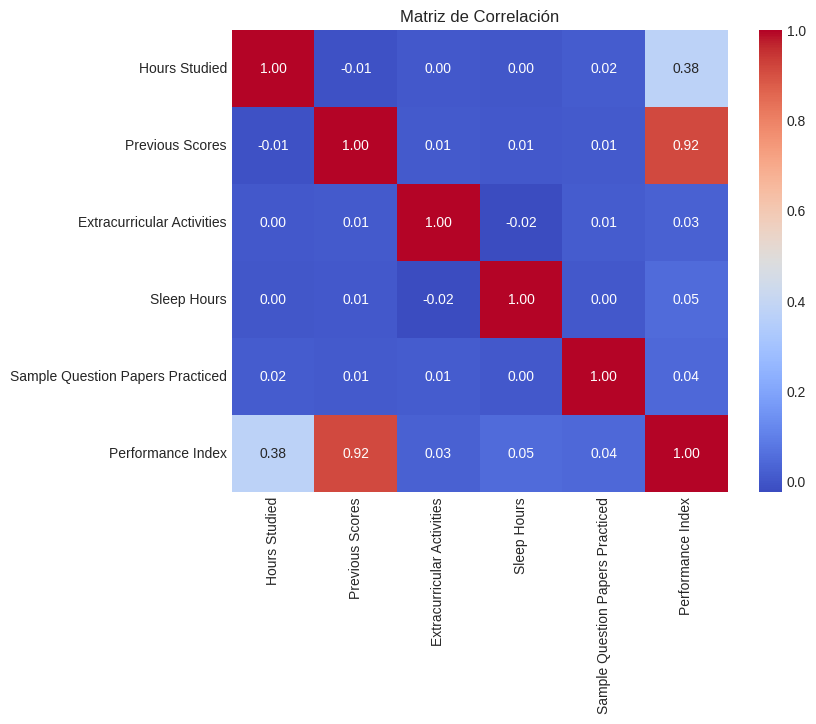

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


## Análisis de la matriz de correlación
----
- La matriz de correlación muestra que **no existe una relación lineal fuerte** entre *Sleep Hours*, *Sample Question Papers Practiced* y *Extracurricular Activities* con respecto a la variable *target*.  
  - Esto posiblemente se deba a que dichas variables presentan una **distribución uniforme**, lo que dificulta capturar correlaciones lineales (aunque podrían reflejar algún tipo de **no linealidad**).  

- En contraste:  
  - *Previous Scores* muestra una correlación **muy alta** con la *target* (**0.92**). Lo cual sugiere que el rendimiento previo es un predictor clave del índice de desempeño.  
  - *Hours Studied* presenta una correlación **moderada** (**0.38**). Lo cual sugiere que estudiar más horas tiende a asociarse con un mejor rendimiento, aunque no de manera tan determinante como los Previous Scores.


In [26]:
target = "Performance Index"
col_booleana = "Extracurricular Activities"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cols_to_scale = [c for c in X.columns if c != col_booleana]

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("\nDespués de escalar:\n")
X_train_scaled.head()


Después de escalar:



,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8591,0.003721,0.096536,False,-1.497153,-0.208907
9120,-1.156282,-0.712663,True,0.268403,-1.257157
4112,-1.542949,-1.175062,False,-1.497153,-1.606574
811,-0.769614,-0.654863,True,-0.320116,-1.257157
6848,-0.769614,0.616735,False,0.856921,1.188761


In [27]:
# Convertimos a float32 para evitar errores con TF
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Dejamos las dos variables con mayor correlacion para prueba posterior
X_train_2var = X_train.drop(columns=['Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities'])
X_test_2var = X_test.drop(columns=['Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities'])

In [44]:
model = models.Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1377.6710 - mae: 32.0085 - val_loss: 75.9657 - val_mae: 7.0931
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 75.3081 - mae: 7.0730 - val_loss: 71.2982 - val_mae: 6.8543
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68.8528 - mae: 6.7127 - val_loss: 65.8043 - val_mae: 6.5672
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62.6890 - mae: 6.4179 - val_loss: 59.5700 - val_mae: 6.2402
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.2542 - mae: 6.1298 - val_loss: 51.7709 - val_mae: 5.8004
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.2104 - mae: 5.6234 - val_loss: 43.6490 - val_mae: 5.3112
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.5318 - mae: 5.2139 - val_loss: 36.9821 - val_mae: 4.8792
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34.1797 - mae: 4.7314 - val_loss: 32.4955 - val_mae: 4.5556
Epoch 9/100
247/247 ━━━━━━━━━

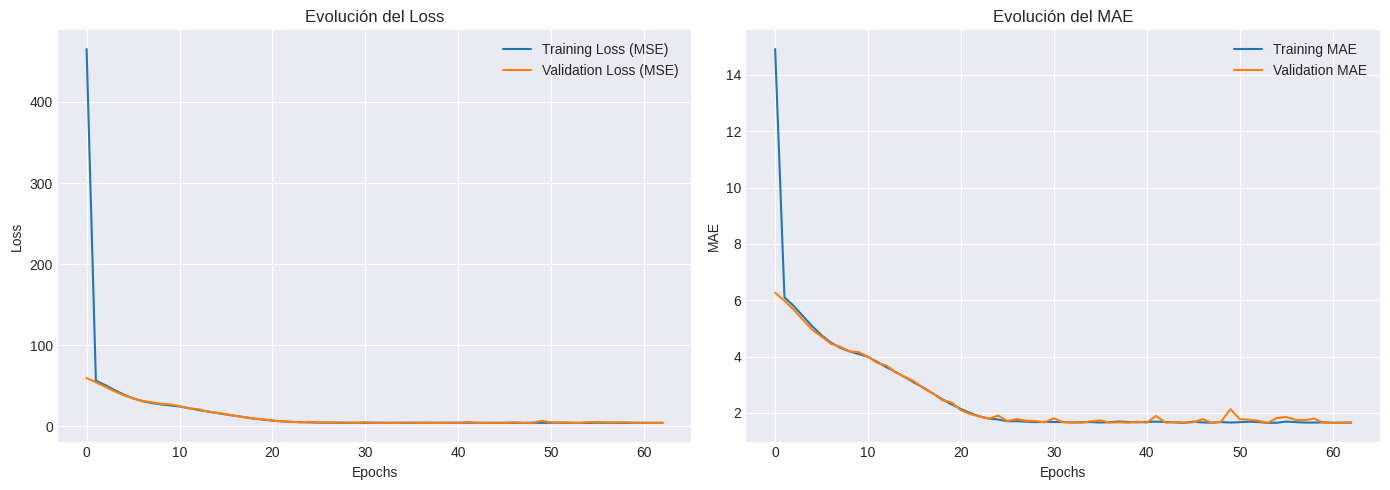

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(history.history['loss'], label='Training Loss (MSE)')
axes[0].plot(history.history['val_loss'], label='Validation Loss (MSE)')
axes[0].set_title('Evolución del Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('Evolución del MAE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [30]:
# Prueba de modelo con las 2 variables de mayor correlacion

model = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

history = model.fit(
    X_train_2var, y_train_np,
    validation_data=(X_test_2var, y_test_np),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1968.1492 - mae: 37.8913 - val_loss: 69.6791 - val_mae: 6.8755
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 65.2582 - mae: 6.6583 - val_loss: 58.8470 - val_mae: 6.2158
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.0716 - mae: 6.0300 - val_loss: 49.3152 - val_mae: 5.6530
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.7782 - mae: 5.5508 - val_loss: 43.1017 - val_mae: 5.3074
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.6828 - mae: 5.2404 - val_loss: 39.3643 - val_mae: 5.0533
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37.5298 - mae: 4.9832 - val_loss: 36.1532 - val_mae: 4.8763
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35.7797 - mae: 4.8739 - val_loss: 33.2971 - val_mae: 4.6560
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31.9870 - mae: 4.6196 - val_loss: 30.2443 - val_mae: 4.5024
Epoch 9/100
247/247 ━━━━━━━━━

----
### Decisiones de diseño

> Hicimos hincapie en maximizar la eficiencia

- **Simplicidad de los datos**  
  - Solo contamos con **5 variables de entrada**, lo que indica una baja complejidad en el problema.  
  - Por ello, optamos por un modelo **pequeño y eficiente**, evitando un número excesivo de neuronas que podría generar sobreajuste innecesario.  

- **Capas ocultas**  
  - Se eligieron **dos capas densas** (16 y 8 neuronas) con activación *ReLU*.  
  - Esto permite que el modelo capture relaciones **no lineales** sin ser demasiado complejo ni tener overfitting.  

- **Capa de salida**  
  - Utilizamos una única neurona con activación *lineal*, dado que es un problema de **regresión**.  

- **Sin regularización adicional**  
  - No aplicamos técnicas como *Dropout* o *L2 regularization*.  
  - Al ser un modelo pequeño y con datos poco complejos, **no se observó overfitting**.  
  - En pruebas previas, al incluir estas técnicas, el rendimiento fue **igual o peor**, por lo que las descartamos.  



## Analisis de los resultados
---
- Los valores de **entrenamiento y validación son prácticamente iguales**, lo que indica que el modelo **generaliza bien** y no presenta *overfitting* ni *underfitting*.  
- Un **MAE ≈ 1.66** implica que, el modelo se equivoca en **~1.7 unidades respecto al valor real** de la variable objetivo, el cual encontramos postivo ya que se encuentra en el rango del 0 al 100.  
- El **MSE ≈ 4.4** confirma que los errores grandes no son frecuentes, ya que no hay una penalización excesiva por outliers.  


### Conclusión
----
El modelo logró un **balance adecuado entre complejidad y capacidad de generalización**.  
El desempeño estable entre train y validación demuestra que la arquitectura elegida (modelo simple, sin regularización extra) fue **apropiada para los datos disponibles**.  
El nivel de error obtenido (MAE ~1.7) puede considerarse **bastante aceptable** dentro del contexto del problema.

#### Prueba de modelo reducido
---

Además, al probar un modelo reducido **utilizando únicamente las dos variables con mayor correlación lineal** con la *target* (*Previous Scores* y *Hours Studied*), se obtuvieron resultados algo peores:  
- `loss: 5.08` – `mae: 1.79` en entrenamiento  
- `val_loss: 5.78` – `val_mae: 1.90` en validación  


Esto sugiere que, si bien **dichas variables son las más relacionadas con la *target***, el resto de las características también aportan valor predictivo, posiblemente a través de **relaciones no estrictamente lineales** que la red logra capturar.  